In [35]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [36]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [37]:
all([i in y_train for i in range(10)])

True

In [38]:
x_train.shape

(60000, 28, 28)

## Preprocessing

In [39]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [40]:
x_train.shape

(60000, 28, 28)

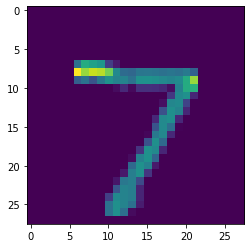

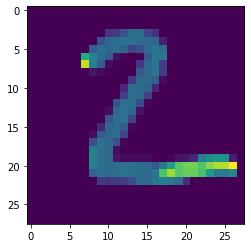

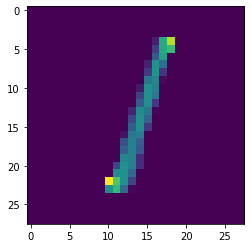

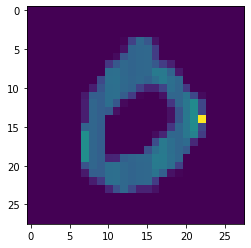

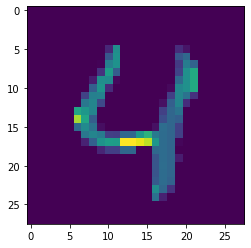

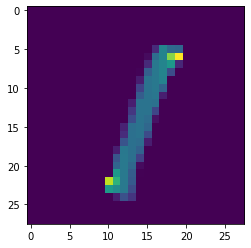

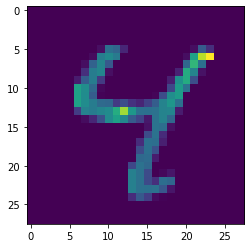

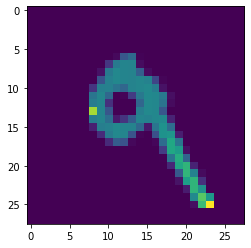

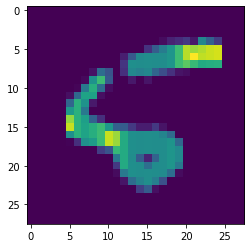

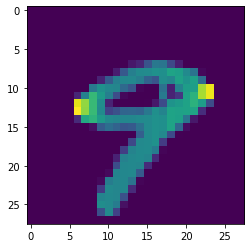

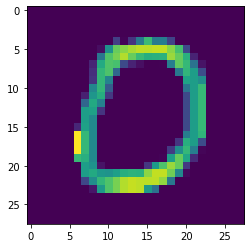

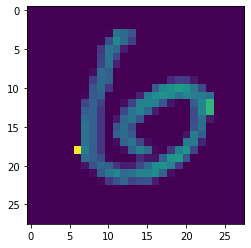

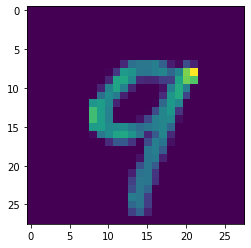

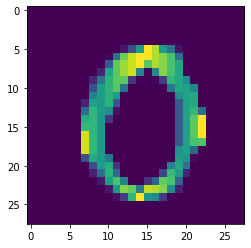

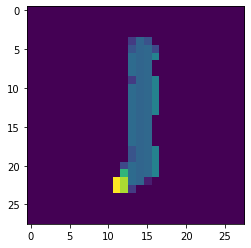

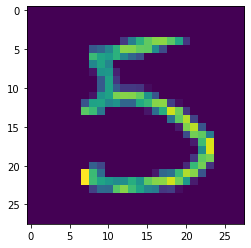

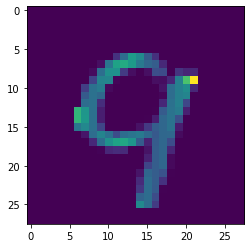

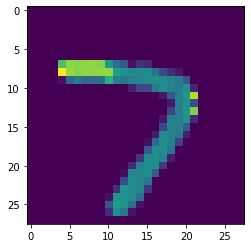

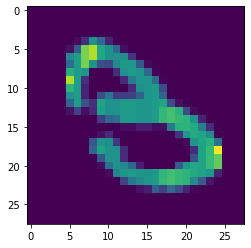

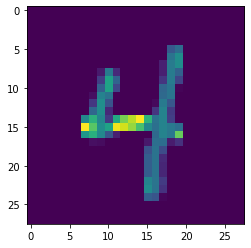

In [41]:
for i in range(20):
    plt.imshow(x_test[i])
    plt.show()

## Model

In [42]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.fit(x_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3782 - accuracy: 0.8968
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1487 - accuracy: 0.9557
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1045 - accuracy: 0.9680
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9762
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0616 - accuracy: 0.9810


In [45]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1078 - accuracy: 0.9670


In [46]:
loss, accuracy

(0.10782573372125626, 0.9670000076293945)

## Loading custom digits

In [47]:
images = []
image_num = 1
while os.path.isfile(f"digits/digit{image_num}.png"):
#     if image_num == 2:
#         img = np.array([x_train[image_num]])
#     else:
    img = cv2.imread(f"digits/digit{image_num}.png")[:,:,0]
    img = np.invert(np.array([img]))
    images.append(img)
#     prediction = model.predict(img)

#     print(f"Prediction: {np.argmax(prediction)}")
#     plt.show()
    image_num += 1

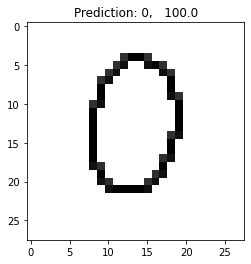

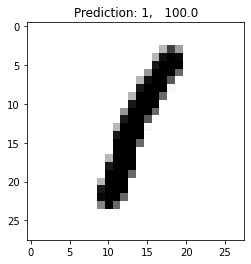

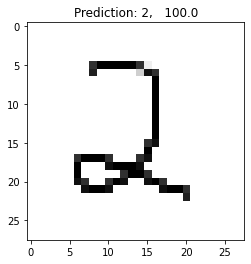

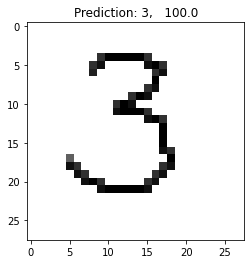

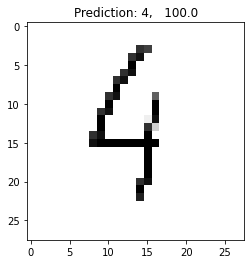

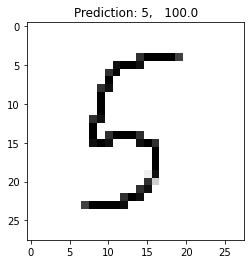

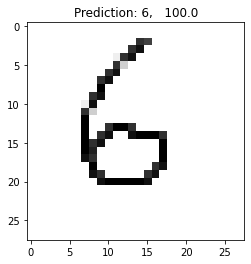

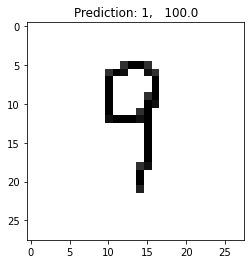

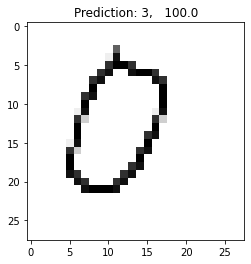

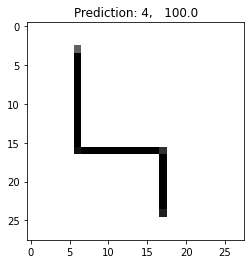

In [48]:
for dig in images:
    prediction = model.predict(dig)
    plt.imshow(dig[0], cmap=plt.cm.binary)
    plt.title(f'Prediction: {np.argmax(prediction)},   {prediction[0, np.argmax(prediction)]*100}')
    plt.show()

In [49]:
model.save('digit_quesser.model')

INFO:tensorflow:Assets written to: digit_quesser.model\assets
